## Cleaning and exploring the data

In [2]:
## importing the packages I need from the library
## using these libraries to convert my data into a dataframe and having the ability to visualise my data through graphs

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
## importing and reading the dataset

dataset = "sample_data/TMDB_movies.csv"

df = pd.read_csv(dataset)


In [ ]:
## Having a look at the first 5 rows of my dataset

df.head()

In [ ]:
## Lookin at how many rows and columns I have in my dataset

df.shape

(4803, 20)

In [ ]:
## Lookin at the different datatypes in my dataset

df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [ ]:
## Looking at the different column names in my dataset

df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
## Looking at the number of nulls within my dataset

null_df = df.isnull()
null_df.sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
## used this code to see the percentage values of the nulls rows in each column

def null_vals(dataframe):
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe)
    null_vals = pd.DataFrame(null_vals,columns=['null'])
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3)

    return null_vals.sort_values('percent', ascending=False)

In [6]:
## Calling the function

null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [ ]:
## I dropped the homepage column as there was 68% of the rows missing information and I didn't believe there were insights to be made from this column

df.drop(['homepage'], axis=1, inplace = True)

df.head()


In [ ]:
## I dropped the tagline column as there was 17% of the rows missing information and I didn't believe there were insights to be made from this column


df.drop(['tagline'], axis=1, inplace = True)

df.head()

In [ ]:
## Checking to see what the % of nulls there were left after I dropped 2 columns

null_vals(df)

,null,percent
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
revenue,0,0.000
production_countries,0,0.000


In [ ]:
## Now I am dropping the overview, runtime and release_date rows that have no data in them.
## I am doing this as there is a very small % of rows without information and this won't have an overall impact on my dataset

df.dropna(
    axis = 0,
    how = 'any',
    subset = ['overview', 'runtime','release_date'],
    inplace = True
)

In [ ]:
## Checking to see what % of nulls there were left after I dropped 2 columns and deleted some rows
# as we can see there are no nulls left in the data

null_vals(df)

,null,percent
budget,0,0.0
genres,0,0.0
vote_average,0,0.0
title,0,0.0
status,0,0.0
spoken_languages,0,0.0
runtime,0,0.0
revenue,0,0.0
release_date,0,0.0
production_countries,0,0.0


In [ ]:
## looking at the statistical summary of the dataset of the numerical columns

df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.799000e+03,4799.000000,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,56899.920192,21.509884,8.232920e+07,106.903105,6.094186,690.789123
std,4.073251e+07,88236.500208,31.824074,1.629076e+08,22.561305,1.188340,1234.941795
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.500000,4.685547,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.000000,12.929525,1.918402e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58461.500000,28.350728,9.295652e+07,118.000000,6.800000,737.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
##Looking at the number of unqiue titles

len(df.title.unique())

4796

In [ ]:
## Changing the title column into a set to see if I get the same number of titles - i.e. removing duplicates

unique = set(df.title)

len(unique)

4796

In [ ]:
## Using this code to create a set with the data stripped and letters turned to lowercase so all the titles are in the same format

clean_unique = set()

for item in unique:
    clean_unique.add(item.strip().lower())

len(clean_unique)

4796

In [ ]:
## Looking at how many options there were in the original language column

df.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
## converting the original_language options to a category

df['original_language'] = df.original_language.astype('category')

## If we check the unique values of the original language column, we can see that its datatype has been updated

df['original_language'].unique()

['en', 'ja', 'fr', 'zh', 'es', ..., 'fa', 'no', 'sl', 'ps', 'el']
Length: 37
Categories (37, object): ['af', 'ar', 'cn', 'cs', ..., 'tr', 'vi', 'xx', 'zh']

In [ ]:
## Using this piece of code to change the genre column information from a dictionary into a list so its suitable for use

import ast
def extract_genres(x):
    x = ast.literal_eval(x)
    Genres = []

    for item in x:
        Genres.append(item['name'])

    return Genres

df['genres'] = df['genres'].apply(extract_genres)


In [ ]:
## this code is to change the keywords from dictionary into a list, with just the words showing and not the id or numbers

import ast
def extract_keywords(x):
    x = ast.literal_eval(x)
    Keywords = []


    for item in x:
        Keywords.append(item['name'])

    return Keywords

df['keywords'] = df['keywords'].apply(extract_keywords)

In [ ]:
## this code is to change the production_companies column from dictionary into a list with just the words showing and not the id or numbers

import ast
def extract_pc(x):
    x = ast.literal_eval(x)
    Production_Companies = []

    for item in x:
        Production_Companies.append(item['name'])

    return Production_Companies

df['production_companies'] = df['production_companies'].apply(extract_pc)

In [ ]:
# this code is to change the production_countries column from dictionary into a list with just the words showing, and not the id or numbers

import ast
def extract_pcoun(x):
    x = ast.literal_eval(x)
    Production_Countries = []

    for item in x:
        Production_Countries.append(item['name'])

    return Production_Countries

df['production_countries'] = df['production_countries'].apply(extract_pcoun)

In [ ]:
## this code is to change the Spoken_languages column from dictionary into a list with just the words showing, and not the id or numbers

import ast
def extract_sl(x):
    x = ast.literal_eval(x)
    Spoken_Languages = []

    for item in x:
        Spoken_Languages.append(item['name'])

    return Spoken_Languages

df['spoken_languages'] = df['spoken_languages'].apply(extract_sl)

In [ ]:
## Using this piece of code to create a column called Profit


df["profit"] = df["revenue"] - df["budget"]

In [ ]:
## Using .head to see the new column I created

df.head(2)

# My Key Points from the dataset

## Looking at the Maximum values in different columns

#### Here we can see the record of the movie with the highest amount of  revenue generated

In [ ]:
## finding the movie with the highest revenue

df.loc[df['revenue']==max(df['revenue'])][['title', 'revenue', 'budget', 'profit', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                  'runtime','vote_average', 'vote_count']]

,title,revenue,budget,profit,genres,popularity,production_companies,production_countries,release_date,runtime,vote_average,vote_count
0,Avatar,2787965087,237000000,2550965087,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,162.0,7.2,11800


#### Here we can see the record for the movie with the longest run time

* We can see that this movie has last a significant amount of profit

  * Maybe we could infer that the longer the movie the less profit it makes

  * Additionally we could infer that the longer the movie the lower the popularity as this movie has a 1.138383 popularity rating

In [ ]:
## finding the movie with the longest runtime

df.loc[df['runtime']==max(df['runtime'])][['title','runtime','profit','budget', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'revenue','vote_average', 'vote_count']]

,title,runtime,profit,budget,genres,popularity,production_companies,production_countries,release_date,revenue,vote_average,vote_count
2384,Carlos,338.0,-17128721,18000000,"[Crime, Drama, Thriller, History]",1.138383,"[Egoli Tossell Film AG, Canal+, Arte France, F...","[France, Germany]",2010-05-19,871279,6.7,50


#### Here we can see the movie with the highest popularity

In [ ]:
## finding the movie with the highest popularity

df.loc[df['popularity']==max(df['popularity'])][['title','popularity','profit','budget', 'genres', 'production_companies','production_countries', 'release_date',\
                                                 'revenue', 'runtime','vote_average', 'vote_count']]

,title,popularity,profit,budget,genres,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
546,Minions,875.581305,1082730962,74000000,"[Family, Animation, Adventure, Comedy]","[Universal Pictures, Illumination Entertainment]",[United States of America],2015-06-17,1156730962,91.0,6.4,4571


#### Here we can see the movie with the highest budget

In [ ]:
## finding the movie with the highest budget

df.loc[df['budget']==max(df['budget'])][['title','budget', 'profit','genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'revenue', 'runtime','vote_average', 'vote_count']]

,title,budget,profit,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
17,Pirates of the Caribbean: On Stranger Tides,380000000,665713802,"[Adventure, Action, Fantasy]",135.413856,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2011-05-14,1045713802,136.0,6.4,4948


#### Here we can see the movie with the highest amount of profit

In [ ]:
##looking at the movie with the highest profit

df["profit"] = df["revenue"] - df["budget"]

df.loc[df['profit']==max(df['profit'])][['title','profit', 'revenue', 'budget', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'runtime','vote_average', 'vote_count']]

,title,profit,revenue,budget,genres,popularity,production_companies,production_countries,release_date,runtime,vote_average,vote_count
0,Avatar,2550965087,2787965087,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,162.0,7.2,11800


####  Here I wanted to look at the movie/ movies with the highest voting average

* Looking at the data from a glance you would see that 4 movies got a perfect rating of 10 out of 10

  * But looking at the amount of people that voted on this movie you can only 1 person voted, and that 1 person must of really enjoyed the movie

  * Additionally if we look at this closer you can see that the profit, budget and revenue for these movies are 0 and in some cases negative

In [ ]:
## Finding the movie with the highest average votes

df.loc[df['vote_average']==max(df['vote_average'])][['title','vote_average','profit', 'revenue', 'budget', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'runtime', 'vote_count']]

,title,vote_average,profit,revenue,budget,genres,popularity,production_companies,production_countries,release_date,runtime,vote_count
3519,Stiff Upper Lips,10.0,0,0,0,[Comedy],0.356495,[],"[United Kingdom, India]",1998-06-12,99.0,1
4045,"Dancer, Texas Pop. 81",10.0,565592,565592,0,"[Comedy, Drama, Family]",0.376662,"[HSX Films, Chase Productions]",[United States of America],1998-05-01,97.0,1
4247,Me You and Five Bucks,10.0,-1,0,1,"[Romance, Comedy, Drama]",0.094105,[],[],2015-07-07,90.0,2
4662,Little Big Top,10.0,0,0,0,[Comedy],0.092100,[Fly High Films],[United States of America],2006-01-01,0.0,1


#### Here we can see the movie with the most amount of ratings

In [ ]:
## seeing the movie with the highest number of votes

df.loc[df['vote_count']==max(df['vote_count'])][['title','vote_count','profit', 'revenue', 'budget', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'runtime', 'vote_average']]

,title,vote_count,profit,revenue,budget,genres,popularity,production_companies,production_countries,release_date,runtime,vote_average
96,Inception,13752,665532764,825532764,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",167.58371,"[Legendary Pictures, Warner Bros., Syncopy]","[United Kingdom, United States of America]",2010-07-14,148.0,8.1


#### Here we can see the movie with the most amount of ratings and with the highest average rating

* There are other movies that have higher ratings but comparing the average rating with the number of people that have rated this movie, you can see this record is the highest rated movie

In [ ]:
## seeing the movie with the highest average vote with the most vote counts

df.loc[df['vote_count']==max(df['vote_count'])][['title','vote_count','vote_average','profit', 'revenue', 'budget', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'runtime']]

,title,vote_count,vote_average,profit,revenue,budget,genres,popularity,production_companies,production_countries,release_date,runtime
96,Inception,13752,8.1,665532764,825532764,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",167.58371,"[Legendary Pictures, Warner Bros., Syncopy]","[United Kingdom, United States of America]",2010-07-14,148.0


# Comparing my two movies

## Movie 1 - Minions

#### The reason I wanted to look at this movie is because it was the movie that was the most popular compared to all other movies in the dataset

In [ ]:
## comparing my two movies:
## minions - the most popular movie:

df.loc[df['popularity']==max(df['popularity'])][['title','budget', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'revenue', 'runtime','vote_average', 'vote_count']]


,title,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
546,Minions,74000000,"[Family, Animation, Adventure, Comedy]",875.581305,"[Universal Pictures, Illumination Entertainment]",[United States of America],2015-06-17,1156730962,91.0,6.4,4571


##Movie 2 - Pirates of the Carribean

#### The reason that I choose to compare this movie, is because this is the movie that had been allocated the highest budget

##### Here we can see some insights that I made when comparing the two movies:

*  Pirates of the carribbean - the movie with the highest budget:
* Even though it had 306 million dollars more to spend, it wasn't nearly as popular as Minions
* Even though it had 306 million dollars more to spend it made 111,017,160 million dollars less than Minions
  * One inferrance that could be made is that people enjoy movies that are in the genre category of Family, Animation and Comedy as opposed to Adventure, Action, Fantasy
*Additionally Minions is around 40 minutes shorter than Pirates of the Carribbean
  * So maybe people enjoy to watch a movie that is shorter
*Furthermore Minions was released 3 year later than Pirates of the Carribbean
  * So maybe movies produced later earnt more money
*Overall the movies had the same average rating with similar number of people rating each movie

In [ ]:
## comparing my second movie:

df.loc[df['budget']==max(df['budget'])][['title','budget', 'genres', 'popularity', 'production_companies','production_countries', 'release_date',\
                                                 'revenue', 'runtime','vote_average', 'vote_count']]

,title,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
17,Pirates of the Caribbean: On Stranger Tides,380000000,"[Adventure, Action, Fantasy]",135.413856,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2011-05-14,1045713802,136.0,6.4,4948


# Looking at the Graphs

#### First graph we will be looking at is the correlation between all the numerical data within the movies dataset

In [ ]:
## First I wanted to see the correlation between all the numerical data:

df.corr()

<ipython-input-93-c34a36c1f63c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
budget,1.000000,-0.088031,0.505250,0.730764,0.269684,0.092399,0.593071,0.575782
id,-0.088031,1.000000,0.033385,-0.049192,-0.150036,-0.266241,-0.002479,-0.032556
popularity,0.505250,0.033385,1.000000,0.644631,0.225265,0.274408,0.778066,0.620782
revenue,0.730764,-0.049192,0.644631,1.000000,0.251112,0.197437,0.781437,0.978881
runtime,0.269684,-0.150036,0.225265,0.251112,1.000000,0.372221,0.271955,0.220000
vote_average,0.092399,-0.266241,0.274408,0.197437,0.372221,1.000000,0.313869,0.208804
vote_count,0.593071,-0.002479,0.778066,0.781437,0.271955,0.313869,1.000000,0.758338
profit,0.575782,-0.032556,0.620782,0.978881,0.220000,0.208804,0.758338,1.000000


## Now to see these figures turned into a heatmap

<ipython-input-94-a5664adc00f3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),
<ipython-input-94-a5664adc00f3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df.corr()),


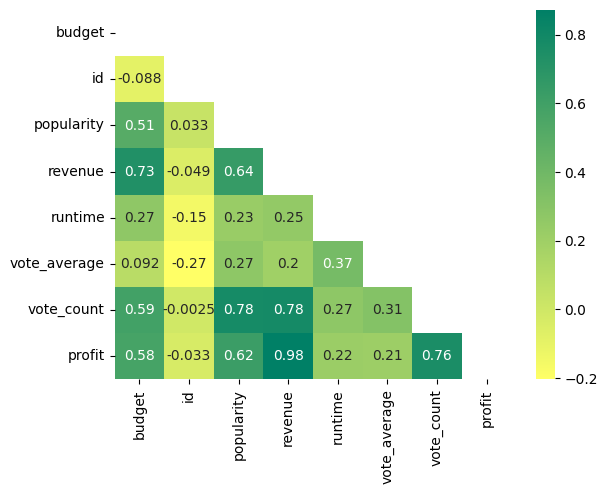

In [ ]:
## Now to visualise that in a heatmap:

sns.heatmap(df.corr(),
           annot=True,
           mask = np.triu(df.corr()),
           cmap = 'summer_r',
           robust=1)

plt.show()

## Top 5 Movies with Highest Revenue

#### Now we will look at the top 5 movies that have the highest amount of revenue which is represented in billions

In [ ]:
most_rev_movie = df.groupby('title')[['revenue', 'budget']].max().sort_values('revenue', ascending = False).head(5).reset_index()
most_rev_movie.head()

,title,revenue,budget
0,Avatar,2787965087,237000000
1,Titanic,1845034188,200000000
2,The Avengers,1519557910,220000000
3,Jurassic World,1513528810,150000000
4,Furious 7,1506249360,190000000


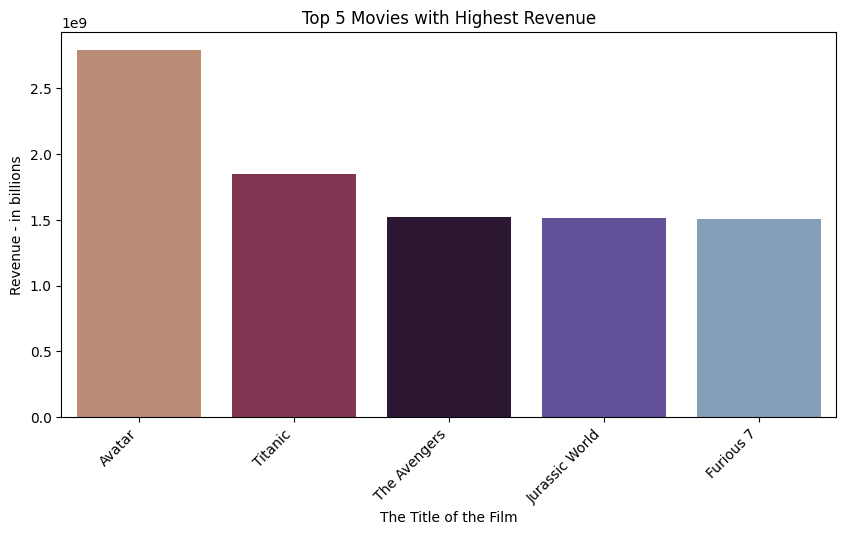

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(x = 'title',
            y ='revenue',
            data = most_rev_movie,
            palette = 'twilight_r')

plt.xticks(rotation=45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium'
          )

plt.xlabel('The Title of the Film')
plt.ylabel('Revenue - in billions')

plt.title('Top 5 Movies with Highest Revenue')

plt.show()

##Top 5 Movies Profitable Movies

#### Here we can see the top 5 most profitable and compare them with the top 5 movies with the most amount of revenue

In [ ]:
movie_prof = df.groupby('title',)[['profit',]].max().sort_values('profit', ascending = False).head(5).reset_index()
movie_prof.head()

,title,profit
0,Avatar,2550965087
1,Titanic,1645034188
2,Jurassic World,1363528810
3,Furious 7,1316249360
4,The Avengers,1299557910


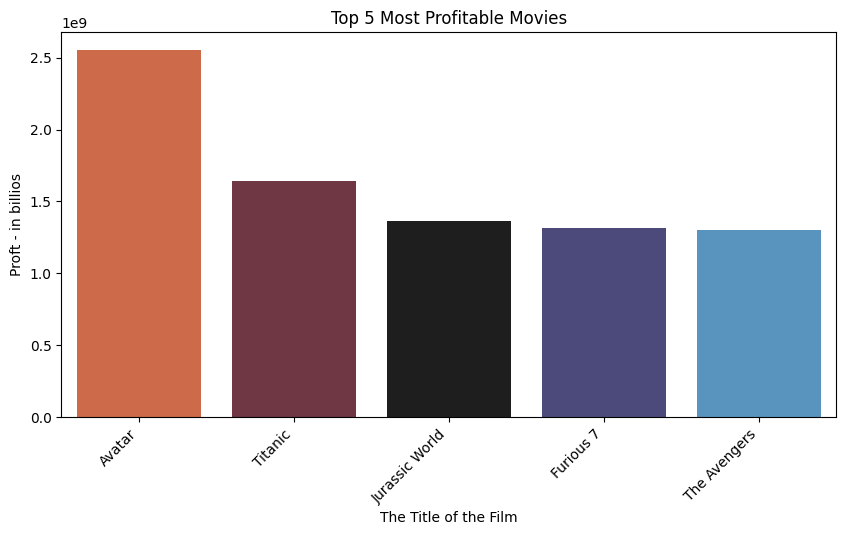

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(x = 'title',
            y ='profit',
            data = movie_prof,
            palette = 'icefire_r')

plt.xticks(rotation=45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium'
          )

plt.xlabel('The Title of the Film')
plt.ylabel('Proft - in billios')

plt.title('Top 5 Most Profitable Movies')

plt.show()

## Top 5 Most Popular Movies

#### Here we can see the most popular movies within the dataset

In [ ]:
movie_pop = df.groupby('title',)[['popularity',]].max().sort_values('popularity', ascending = False).head(5).reset_index()
movie_pop.head()

,title,popularity
0,Minions,875.581305
1,Interstellar,724.247784
2,Deadpool,514.569956
3,Guardians of the Galaxy,481.098624
4,Mad Max: Fury Road,434.278564


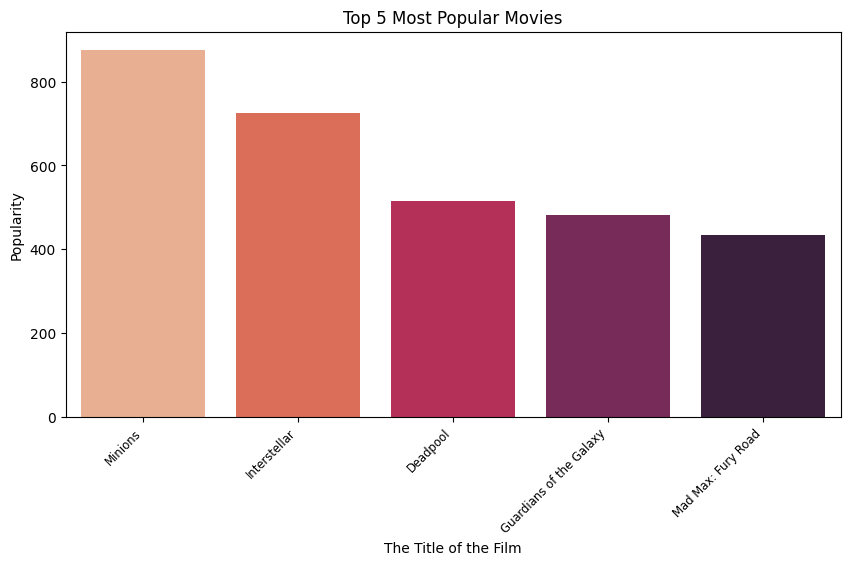

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(x = 'title',
            y ='popularity',
            data = movie_pop,
            palette = 'rocket_r')

plt.xticks(rotation=45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small'
          )

plt.xlabel('The Title of the Film')
plt.ylabel('Popularity')

plt.title('Top 5 Most Popular Movies')

plt.show()